<a href="https://colab.research.google.com/github/pankajr141/audio_experiments/blob/master/Experiment_Audio_Filter_Take_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import IPython
import wave
import struct
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
audiofile =  'drive/My Drive/datasets/whistle_withoutac.m4a'

In [0]:
IPython.display.Audio(audiofile)

### Converting m4a file to wav format

In [0]:
!pip install pydub
from pydub import AudioSegment

In [0]:
file_extension = 'm4a'
track = AudioSegment.from_file(audiofile, file_extension)
audiofile_wave = audiofile.replace(file_extension, 'wav')
file_handle = track.export(audiofile_wave, format='wav')
print(audiofile_wave)

drive/My Drive/datasets/whistle_withoutac.wav


In [0]:
IPython.display.Audio(audiofile_wave)

### Reading wav file

In [127]:
# from scipy.io import wavfile
# fs, data = wavfile.read(audiofile_wave)
# print(fs, len(data))

wav_file = wave.open(audiofile_wave, 'r')
nchannels, sampwidth, framerate, nframes, comptype, compname = wav_file.getparams()
print("Params:", nchannels, sampwidth, framerate, nframes, comptype, compname)

original_wave = wav_file.readframes(nframes)
wav_file.close()

print("Length:", nframes)
data = struct.unpack('{n}h'.format(n=length), original_wave)
data = np.array(data)
print("Max data:", np.max(data))

# Fast Fourier Transform
data_fft = np.fft.fft(data)

# Above value is in complex number but we want absolute number
# This will give us the frequency we want
frequencies = np.abs(data_fft)
print("The max frequency is {} Hz".format(np.max(frequencies)))

Params: 1 2 44100 676864 NONE not compressed
Length: 676864
Max data: 32767
The max frequency is 132010984.99065651 Hz


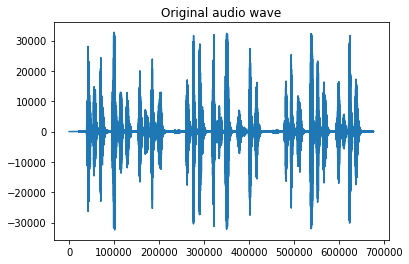

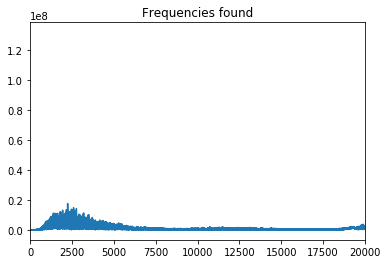

In [112]:
plt.title("Original audio wave")
plt.plot(data)
plt.show()

plt.title("Frequencies found")
plt.plot(frequencies)
plt.xlim(0, 20000)
plt.show()

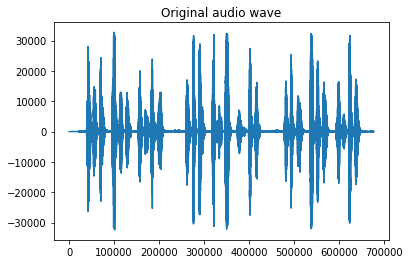

In [126]:
# Filter based on Amplitude
data.shape
data[(data > -1000) & (data < 0)] = 0
data
plt.title("Original audio wave")
plt.plot(data)
plt.show()

IPython.display.Audio(data=data, rate=44100)

http://pythonaudio.blogspot.com/2014/04/3-reading-wave-file.html

**Channels:**   A standard wave file consist of 2 channels,  

`wav_file.setnchannels(1) ensures that this is a mono-sound. For stereo use: wav_file.setnchannels(2)`

Each Channel sample is stored as a 16bit Signed number Hence  can have range (**-32768 : +32767** )

**Sample rate:** 
Audio signals are analog, but we want to represent them digitally. Meaning we want to discretize them in value and in time. The sample rate gives how many times per second we get a value. The unit is Hz.

 The sample rate needs to be at least double of the highest frequency in the original sound [Based on Nyquist theorm which states that to retain freq f we should sample at rate 2f] otherwise you get aliasing. 
 
Human hearing range goes from ~20Hz to ~20kHz, so you can cut off anything above 20kHZ. Meaning a sample rate of more than 40kHz does not make much sense


**Bit-depth:**  The higher the bit-depth, the more dynamic range can be captured. Dynamic range is the difference between the quietest and loudest volume of an instrument, part or piece of music. A typical value seems to be 16 bit or 24 bit. A bit-depth of 16 bit has a theoretical dynamic range of 96 dB, whereas 24 bit has a dynamic range of 144 dB (source).


**Subtype:** PCM_16 means 16 bit depth, where PCM stands for Pulse-Code Modulation.








The Max filter frequency is 650376 Hz
[-264872.             +0.j          -13962.29673086 +55617.80323582j
   97899.20668918 +43843.61546023j ...  -41388.83186879+115736.84221811j
   97899.20668918 -43843.61546023j  -13962.29673086 -55617.80323582j]
[264872.          57343.57650844 107268.43565092 ... 122914.81623499
 107268.43565092  57343.57650843]
[ 1.80523003e-12-1.23863921e-12j  4.84330008e-13-1.37401621e-12j
  2.70234129e-12-6.16124230e-13j ... -2.00000000e+00+1.32799995e-12j
 -1.50000000e+01-5.90929096e-13j -9.00000000e+00-8.34700121e-13j]
[590333.96482035+0.00000000e+00j 547664.35692986-1.20042487e-12j
 480533.87757942-1.29675662e-12j ... 401076.86180422+2.39771370e-12j
 480533.87757942+3.93997964e-13j 547664.35692986+1.03209795e-12j]


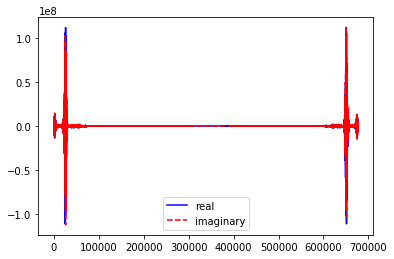

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [108]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(frequencies)]
filtered_freq = [f for index, f in enumerate(frequencies)]
print("The Max filter frequency is {} Hz".format(np.argmax(filtered_freq))

print("========================")
print(data_fft)

print(frequencies)

print(np.fft.ifft(data_fft))
print(np.fft.ifft(filtered_freq))


print("========================")

plt.plot(np.arange(nframes), data_fft.real, 'b-', np.arange(nframes), data_fft.imag, 'r--')
plt.legend(('real', 'imaginary'))
plt.show()

# Inverse fast fourier transform
recovered_signal = np.fft.ifft(data_fft)

# IPython.display.Audio(data=recovered_signal, rate=framerate)
print("Max data:", np.max(recovered_signal))

In [0]:
amplitude = 1
filtered_file = "filter.wav"
wav_file=wave.open(filtered_file, 'w') 
# The tuple should be (nchannels, sampwidth, framerate, nframes, comptype, compname)
wav_file.setparams((nchannels, sampwidth, framerate, nframes, "NONE", "not compressed"))

#Struct is a Python library that takes our data and packs it as binary data. The h in the code means 16 bit number.
for s in recovered_signal:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))
wav_file.close()
IPython.display.Audio(filtered_file)